# **----------------------------------------------- LAB 2 ------------------------------------------------**

**OVERVIEW**

In this notebook, the work is divided into two parts: the first part demonstrates querying and exploring the dataset using SQL, and the second part focuses on analyzing temperature and precipitation trends, including year-to-year comparisons and a similar analysis for another town.

# **HOMEWORK - PART 1**

Screen shots of the results of the queries :

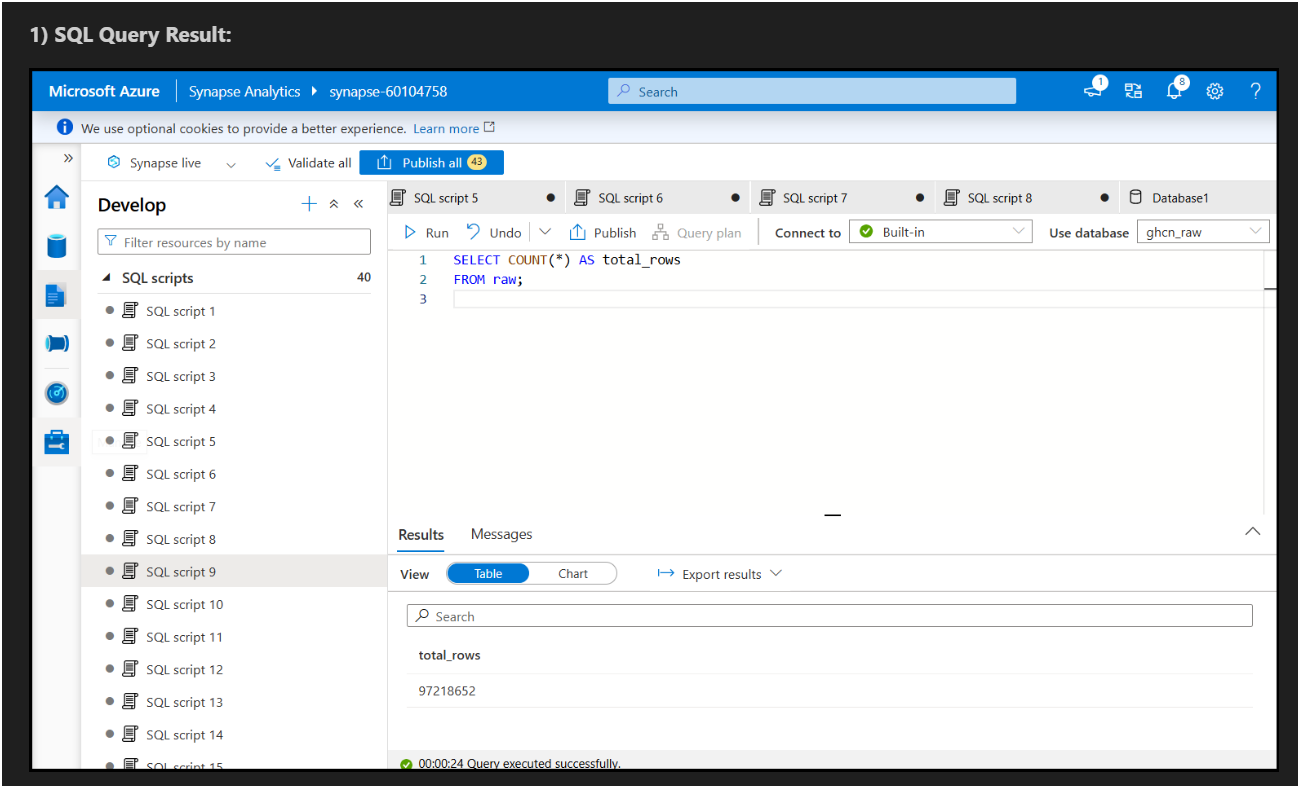

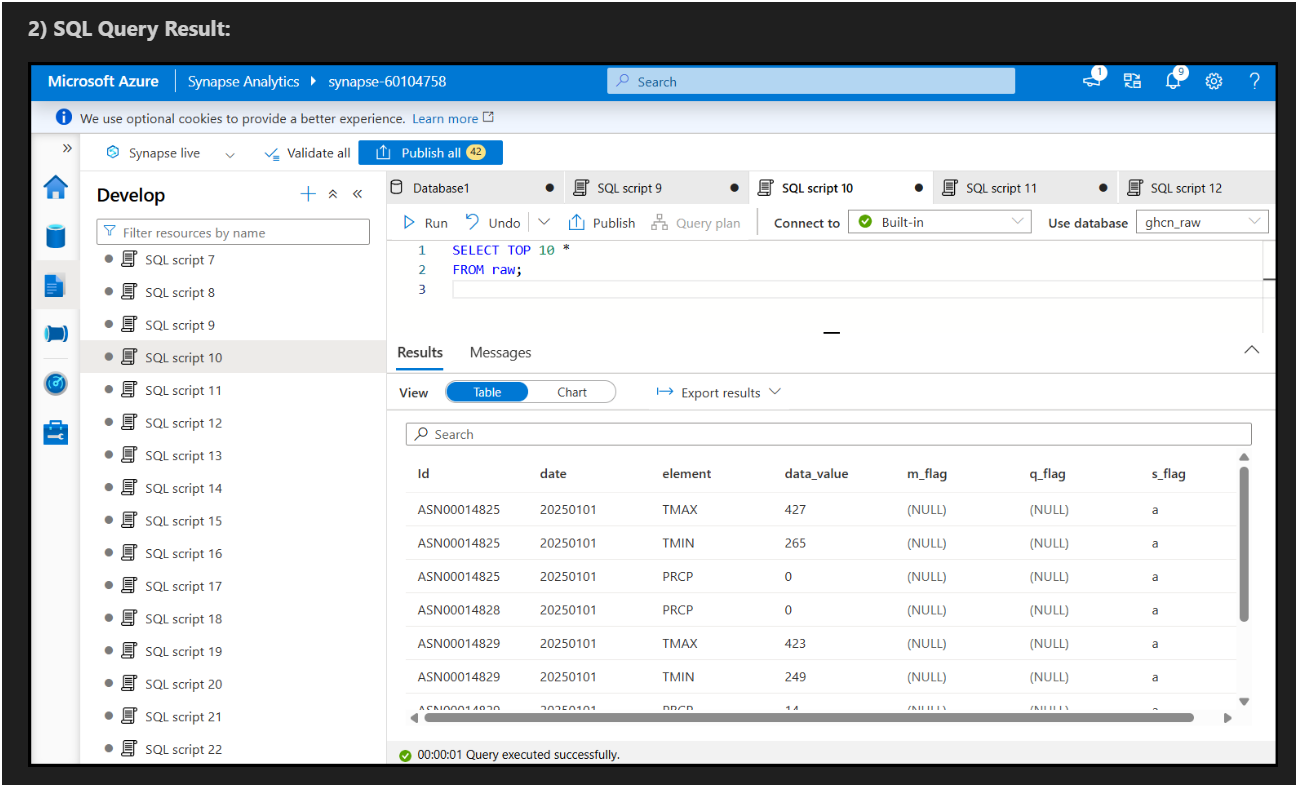

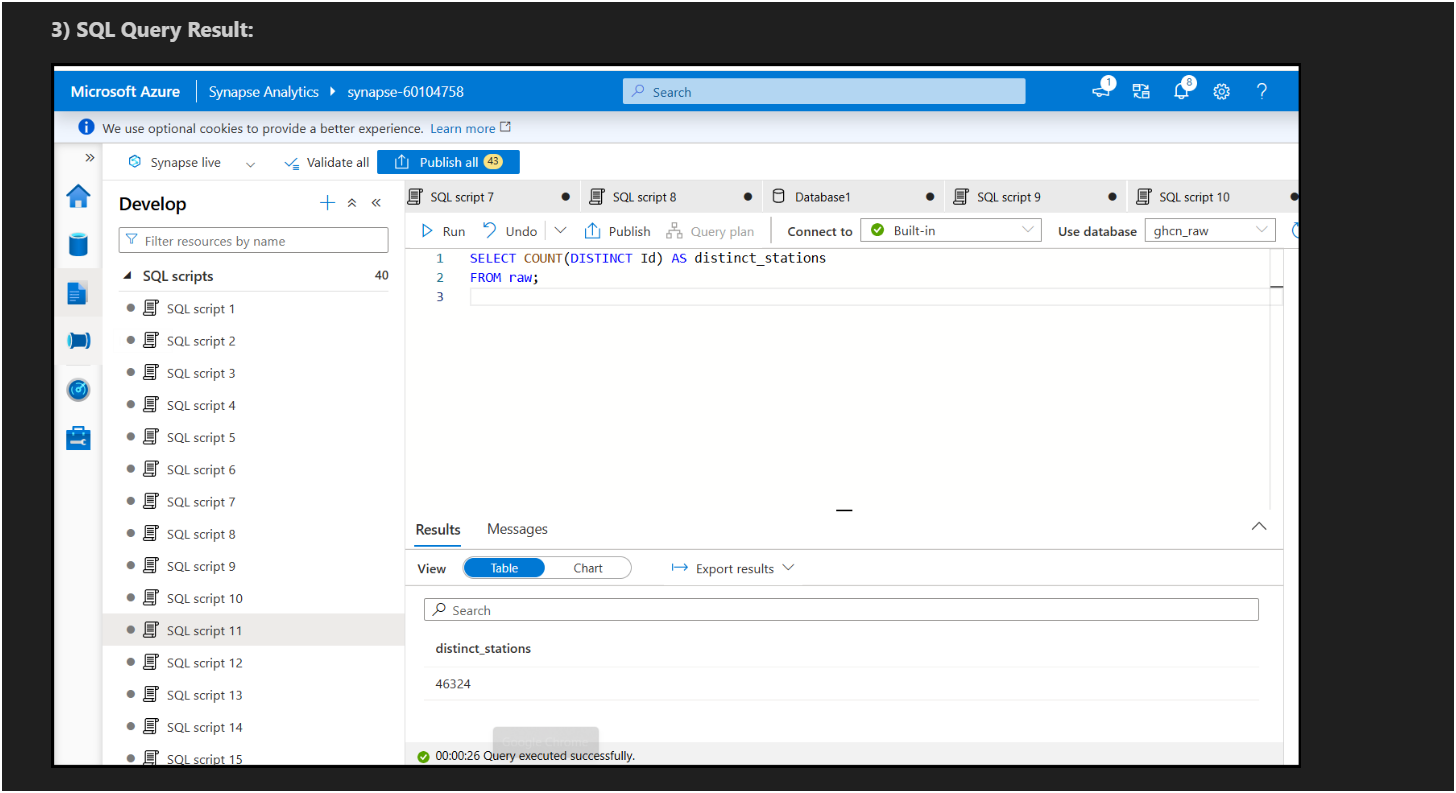

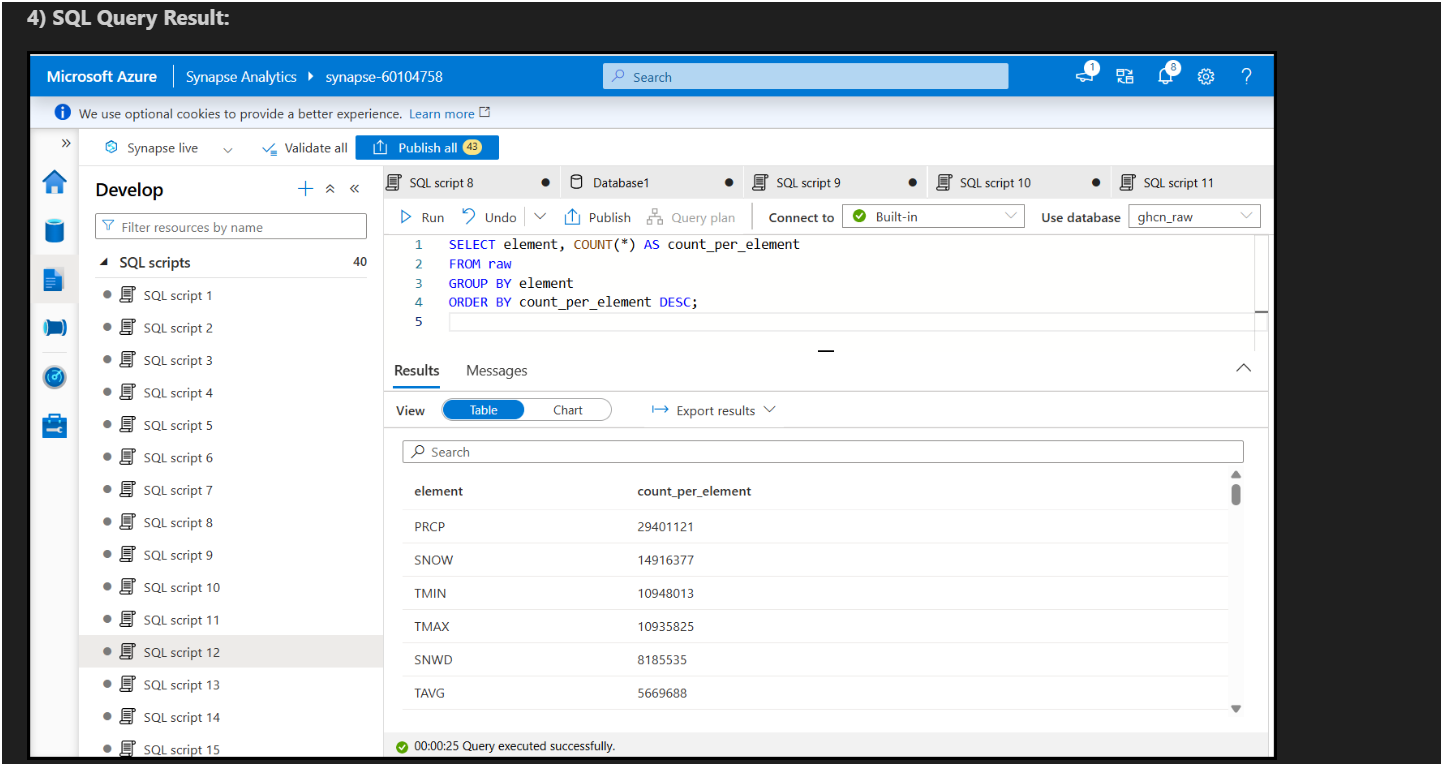

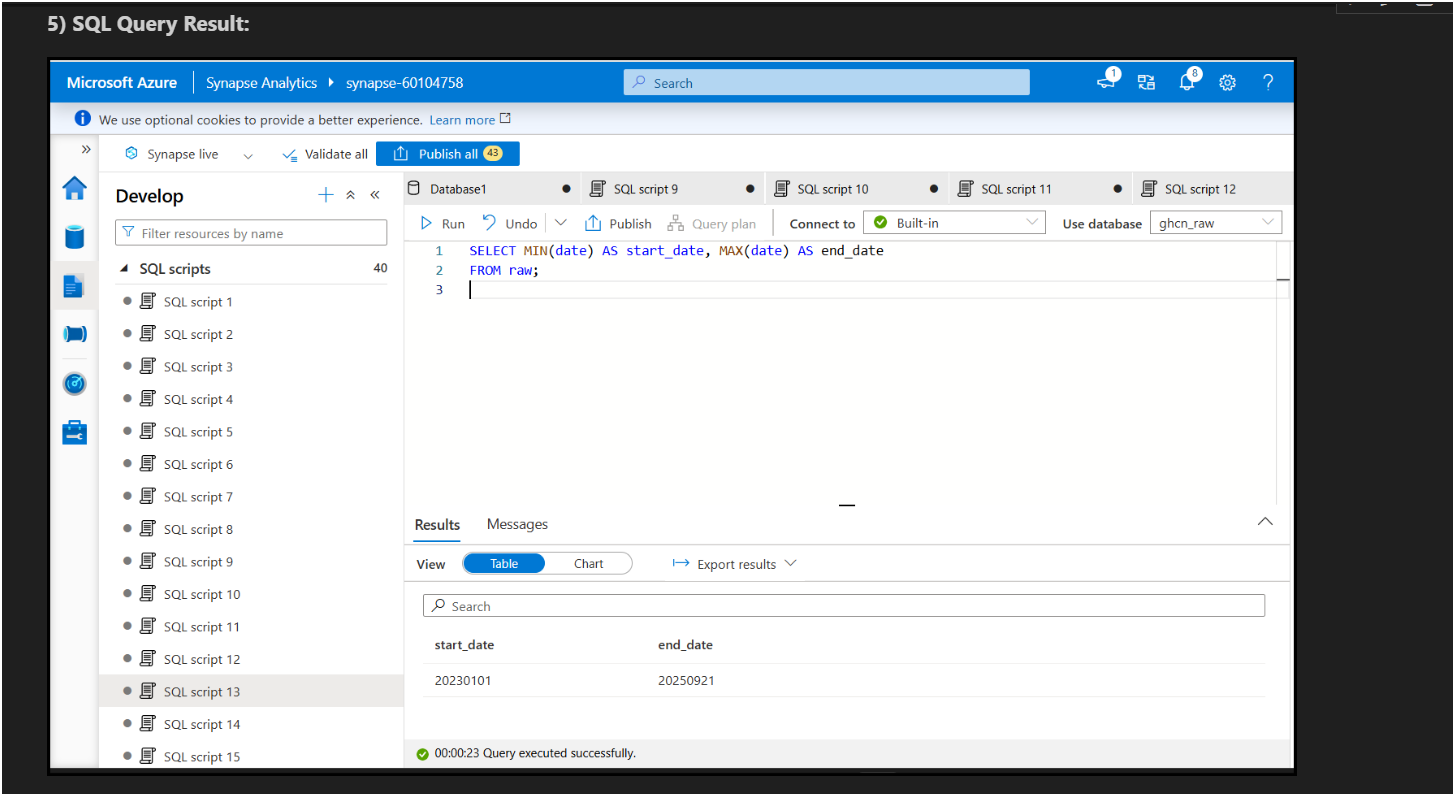

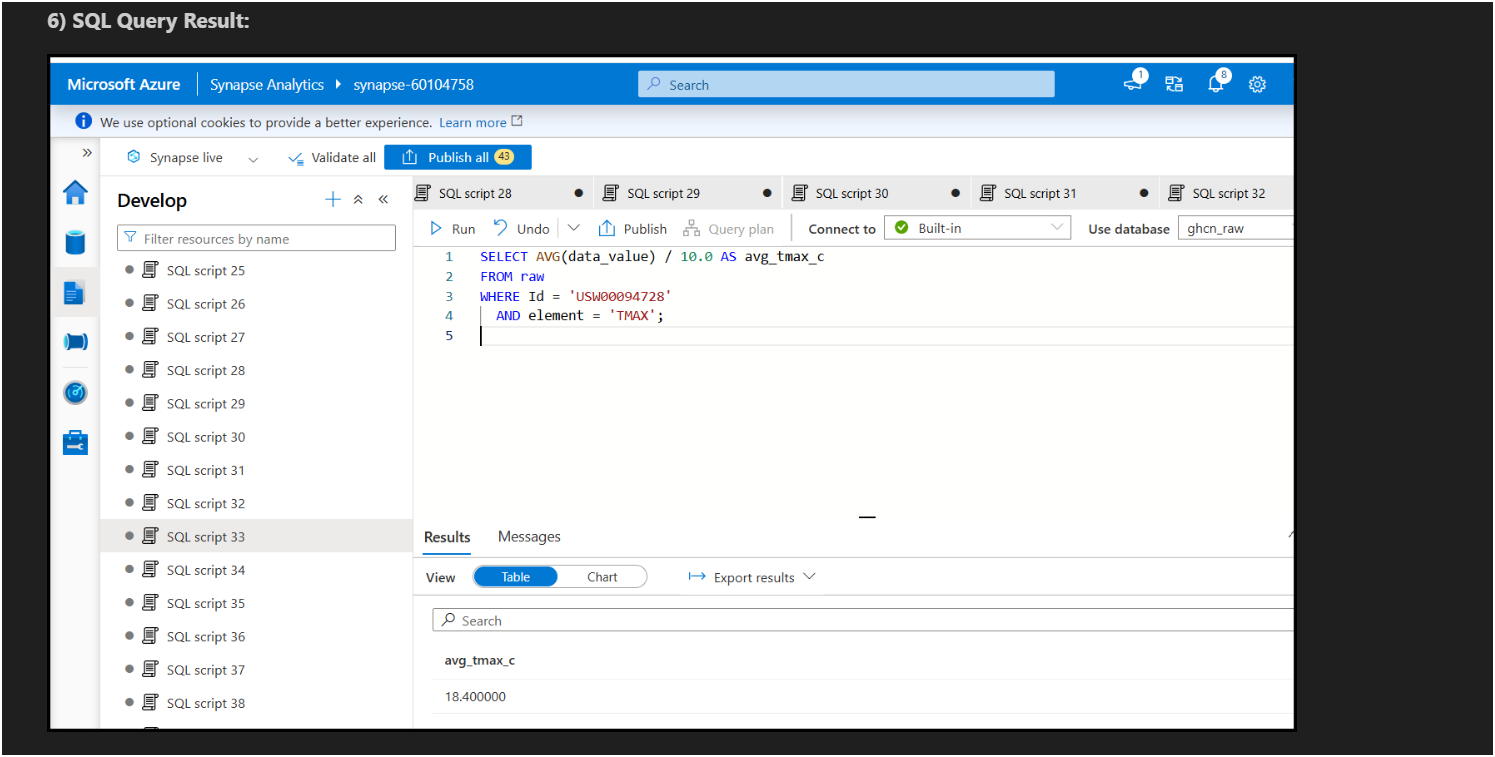

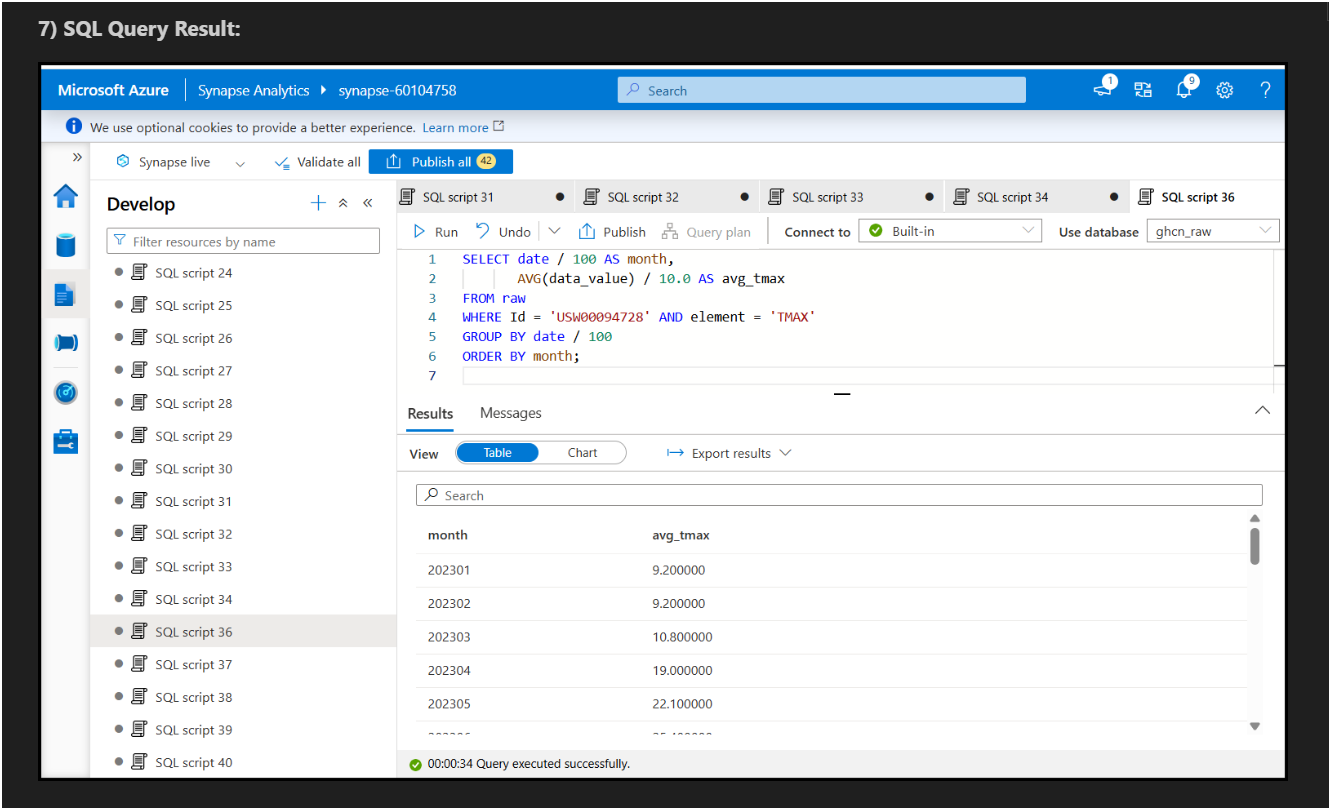

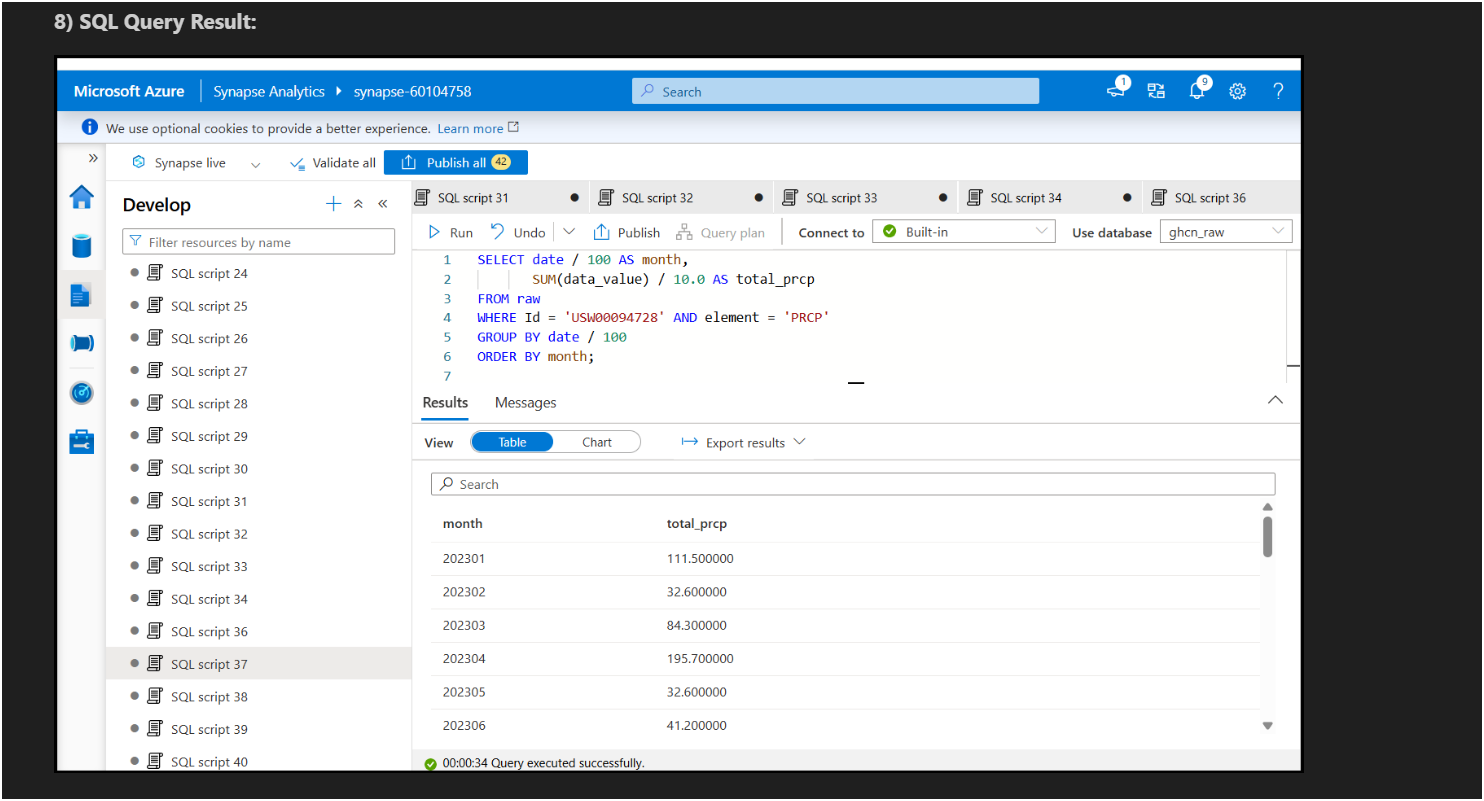

# **HOMEWORK - PART 2**

Code and results with figures

# **Q1)**

In [ ]:
# Q1) READ THE TEMPERATURE DATA

query_tmax = sa.text("""
SELECT date, max_temp_c
FROM tmax_series
ORDER BY date;
""")

with engine.connect() as conn:
    df_tmax = pd.read_sql(query_tmax, conn)

df_tmax['date'] = pd.to_datetime(df_tmax['date'].astype(str), format='%Y%m%d')
df_tmax.head()

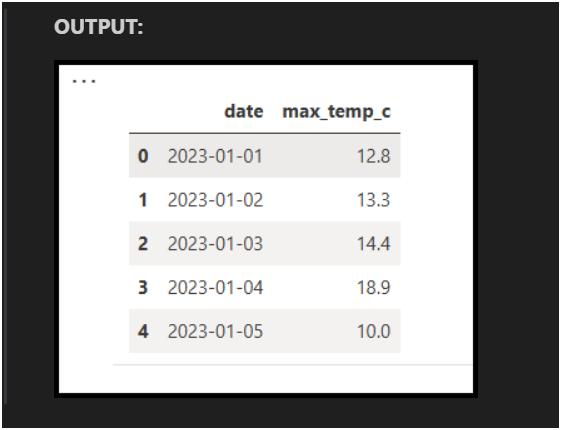

# **Q2)**

In [ ]:
# Q2) DISPLAY THE TEMPERATURE AND THE PRECIPITATION OVER THE YEARS.
df_weather = pd.merge(df_prcp, df_tmax, on='date')
df_weather.set_index('date', inplace=True)

df_yearly = df_weather.groupby(df_weather.index.year).agg({
    'max_temp_c': 'mean',
    'precipitation_mm': 'sum'
}).reset_index().rename(columns={'date':'year'})

df_yearly

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot(df_yearly['year'], df_yearly['max_temp_c'], color='red', marker='o', label='Avg Temp (°C)')
plt.plot(df_yearly['year'], df_yearly['precipitation_mm'], color='blue', marker='s', label='Total Precipitation (mm)')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Yearly Temperature & Precipitation")
plt.xticks(df_yearly['year'])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_weather.index, df_weather['max_temp_c'], color='red', label='Max Temperature (°C)')
plt.plot(df_weather.index, df_weather['precipitation_mm'], color='blue', label='Precipitation (mm)')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Temperature and Percipitation over the years")
plt.legend()

plt.tight_layout()
plt.show()


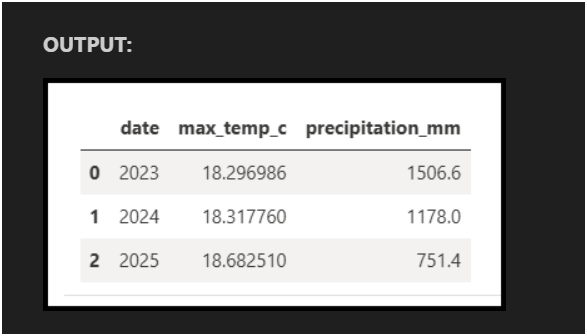

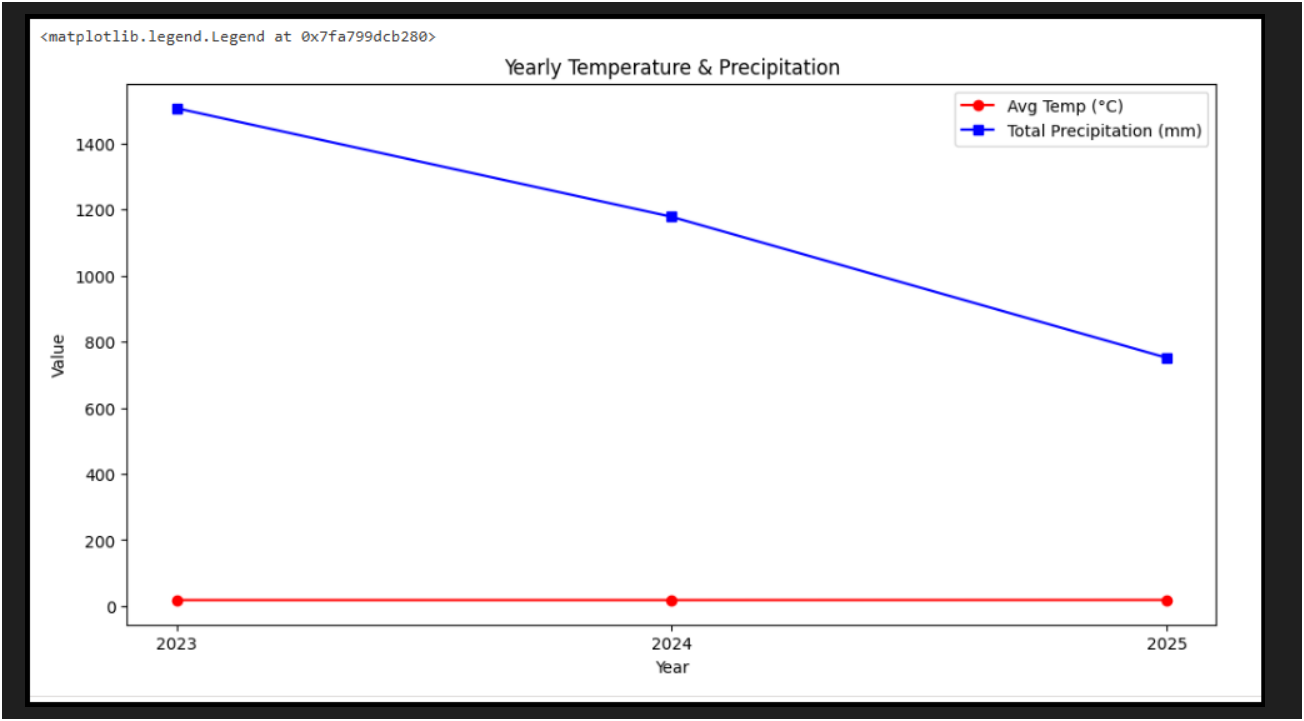

# **Q3)**

In [ ]:
# Q3) DISPLAY THE TEMPERATURE AND PRECIPITATION DIFFERENCE YEAR BY YEAR (2024-2023) AND (2025-2024)
df_yearly['temp_diff'] = df_yearly['max_temp_c'].diff()
df_yearly['prcp_diff'] = df_yearly['precipitation_mm'].diff()

year_prev = df_yearly['year'].shift(1).fillna(0).astype(int)
year_curr = df_yearly['year'].astype(int)

df_yearly['year_interval'] = year_curr.astype(str) + '-' + year_prev.astype(str)

year_diff = df_yearly[['year_interval', 'temp_diff', 'prcp_diff']].iloc[1:]
year_diff

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.bar(year_diff['year_interval'], year_diff['temp_diff'], color='red')
plt.title('Yearly Temperature Differences')
plt.ylabel('Temp Diff (°C)')
plt.xlabel('Year Interval')


plt.subplot(1, 2, 2)
plt.bar(year_diff['year_interval'], year_diff['prcp_diff'], color='blue')
plt.title('Yearly Precipitation Differences')
plt.ylabel('Precipitation Diff (mm)')
plt.xlabel('Year Interval')

plt.tight_layout()
plt.show()

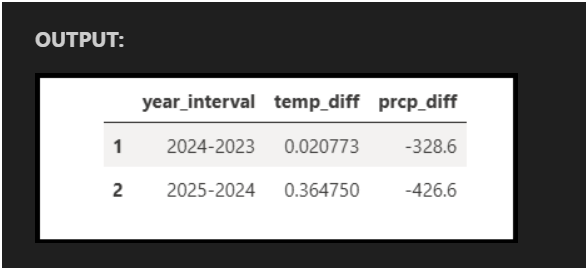

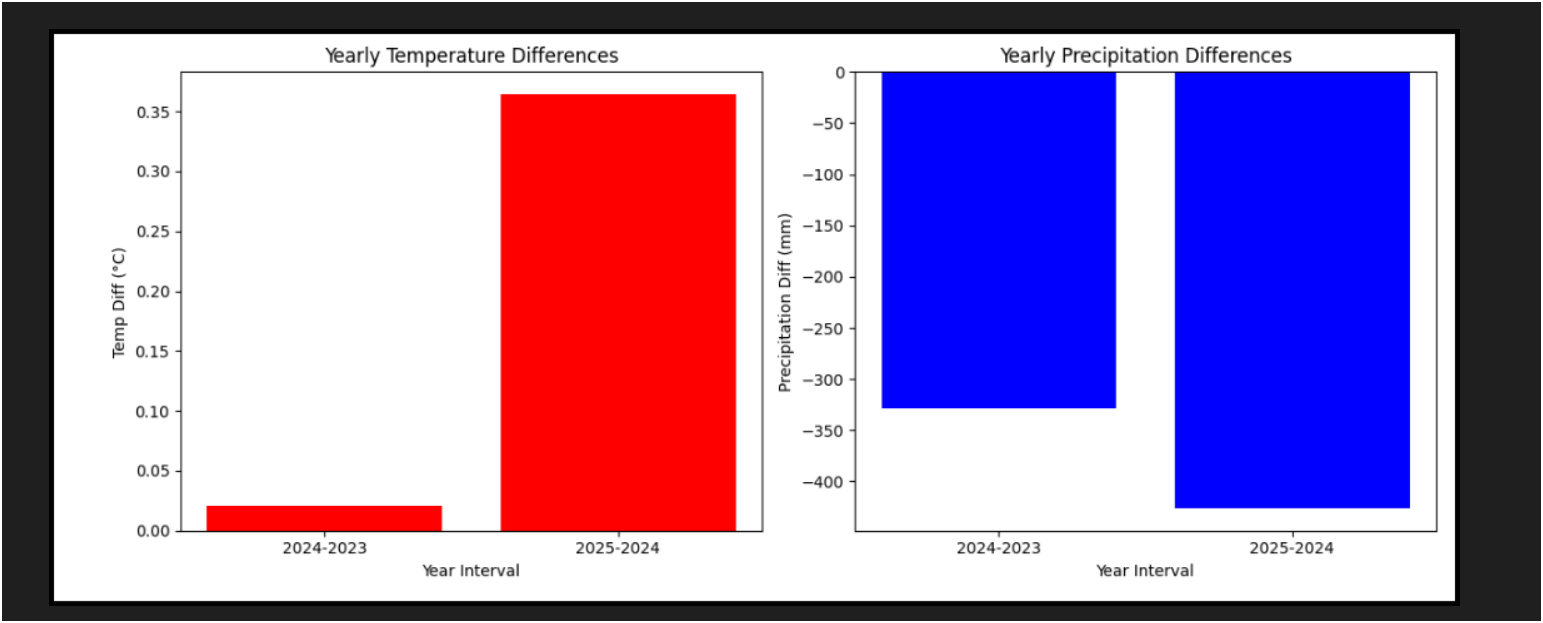

# **Q4)**

In [ ]:
# Q4) REDO THE ACQUISITION OF THE TEMPERATURE AND PRECIPITATION FOR A TOWN
# -----------------------------------------------------------------------------------------------------------------------
new_station_id = "USW00014732"

#1- READ PRECIPITATION AND TEMPERATURE
# -----------------------------------------------------------------------------------------------------------------------
query_prcp_new = sa.text(f"""
SELECT date, data_value/10.0 AS precipitation_mm
FROM climate_parquet
WHERE Id = '{new_station_id}' AND element = 'PRCP'
ORDER BY date;
""")

with engine.connect() as conn:
    df_prcp_new = pd.read_sql(query_prcp_new, conn)
df_prcp_new['date'] = pd.to_datetime(df_prcp_new['date'].astype(str), format='%Y%m%d')

query_tmax_new = sa.text(f"""
SELECT date, data_value/10.0 AS max_temp_c
FROM climate_parquet
WHERE Id = '{new_station_id}' AND element = 'TMAX'
ORDER BY date;
""")

with engine.connect() as conn:
    df_tmax_new = pd.read_sql(query_tmax_new, conn)
df_tmax_new['date'] = pd.to_datetime(df_tmax_new['date'].astype(str), format='%Y%m%d')

df_weather_new = pd.merge(df_prcp_new, df_tmax_new, on='date')
df_weather_new.set_index('date', inplace=True)
print("read temp and precipitation")
print(df_weather_new.head())

#2- DISPLAY THE TEMPERATURE AND THE PRECIPITATION OVER THE YEARS
# -----------------------------------------------------------------------------------------------------------------------
df_yearly_new = df_weather_new.groupby(df_weather_new.index.year).agg({
    'max_temp_c': 'mean',
    'precipitation_mm': 'sum'
}).reset_index()

df_yearly_new.rename(columns={df_yearly_new.columns[0]:'year'}, inplace=True)
print("yearly distribution")
print(df_yearly_new.head())

plt.figure(figsize=(10,6))
plt.plot(df_yearly_new['year'], df_yearly_new['max_temp_c'], color='red', marker='o', label='Avg Temp (°C)')
plt.plot(df_yearly_new['year'], df_yearly_new['precipitation_mm'], color='blue', marker='s', label='Total Precipitation (mm)')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Yearly Temperature & Precipitation")
plt.xticks(df_yearly_new['year'])
plt.legend()
plt.show()

#3- DISPLAY THE TEMPERATURE AND PRECIPITATION DIFFERENCE YEAR BY YEAR (2024-2023) AND (2025-2024).
# -----------------------------------------------------------------------------------------------------------------------
df_yearly_new['temp_diff'] = df_yearly_new['max_temp_c'].diff()
df_yearly_new['prcp_diff'] = df_yearly_new['precipitation_mm'].diff()

year_prev = df_yearly_new['year'].shift(1).astype('Int64')
year_curr = df_yearly_new['year'].astype('Int64')

df_yearly_new['year_interval'] = year_curr.astype(str) + '-' + year_prev.astype(str)
year_diff_new = df_yearly_new[['year_interval', 'temp_diff', 'prcp_diff']].iloc[1:]
print("Year difference calculation")
print(year_diff_new)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(year_diff_new['year_interval'], year_diff_new['temp_diff'], color='red')
plt.title('Yearly Temperature Differences')
plt.ylabel('Temp Diff (°C)')
plt.xlabel('Year Interval')
plt.subplot(1,2,2)
plt.bar(year_diff_new['year_interval'], year_diff_new['prcp_diff'], color='blue')
plt.title('Yearly Precipitation Differences')
plt.ylabel('Precipitation Diff (mm)')
plt.xlabel('Year Interval')
plt.tight_layout()
plt.show()

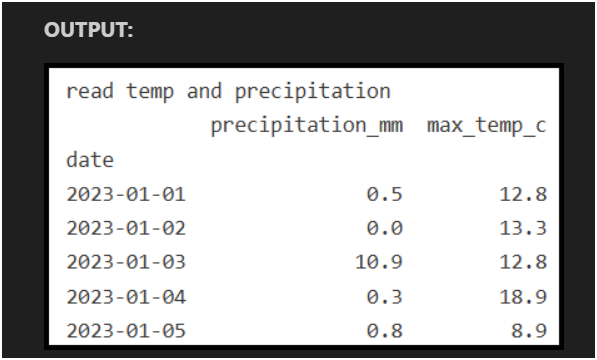

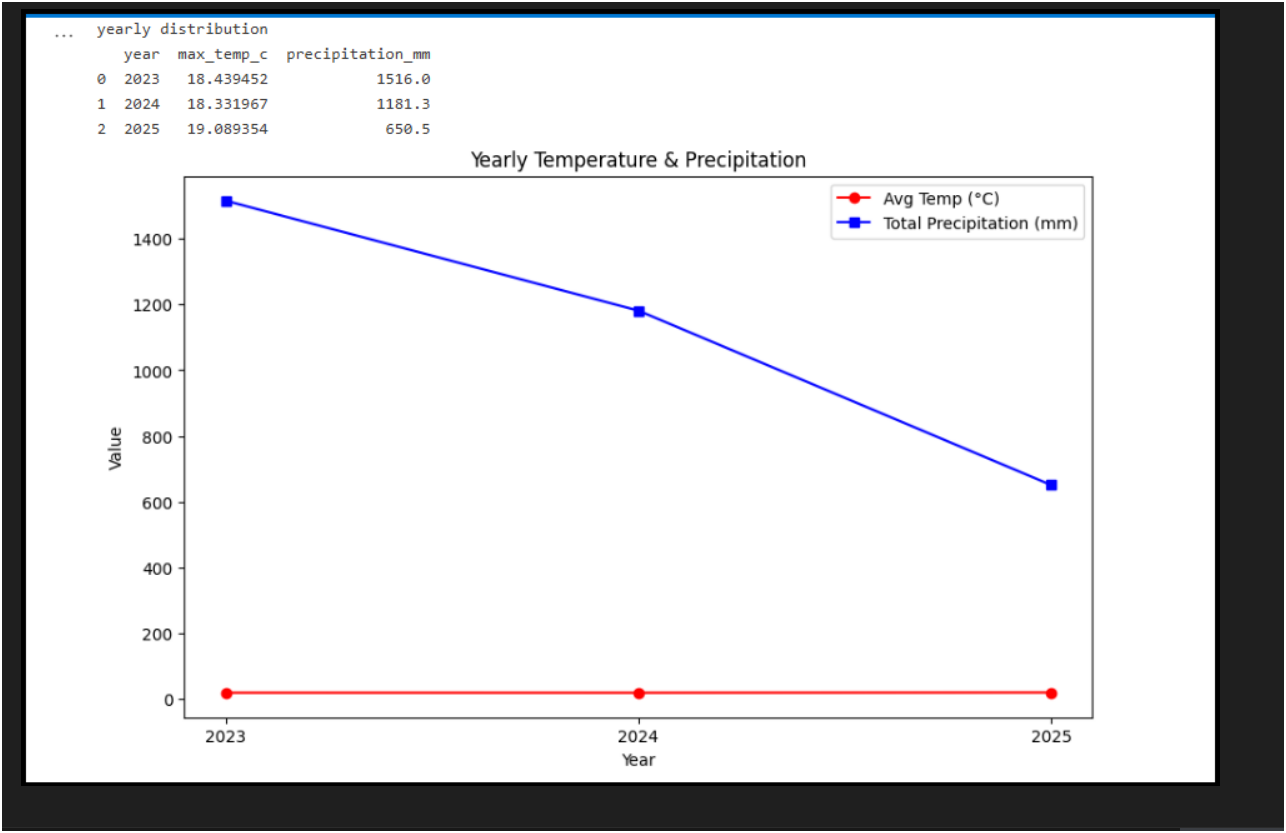

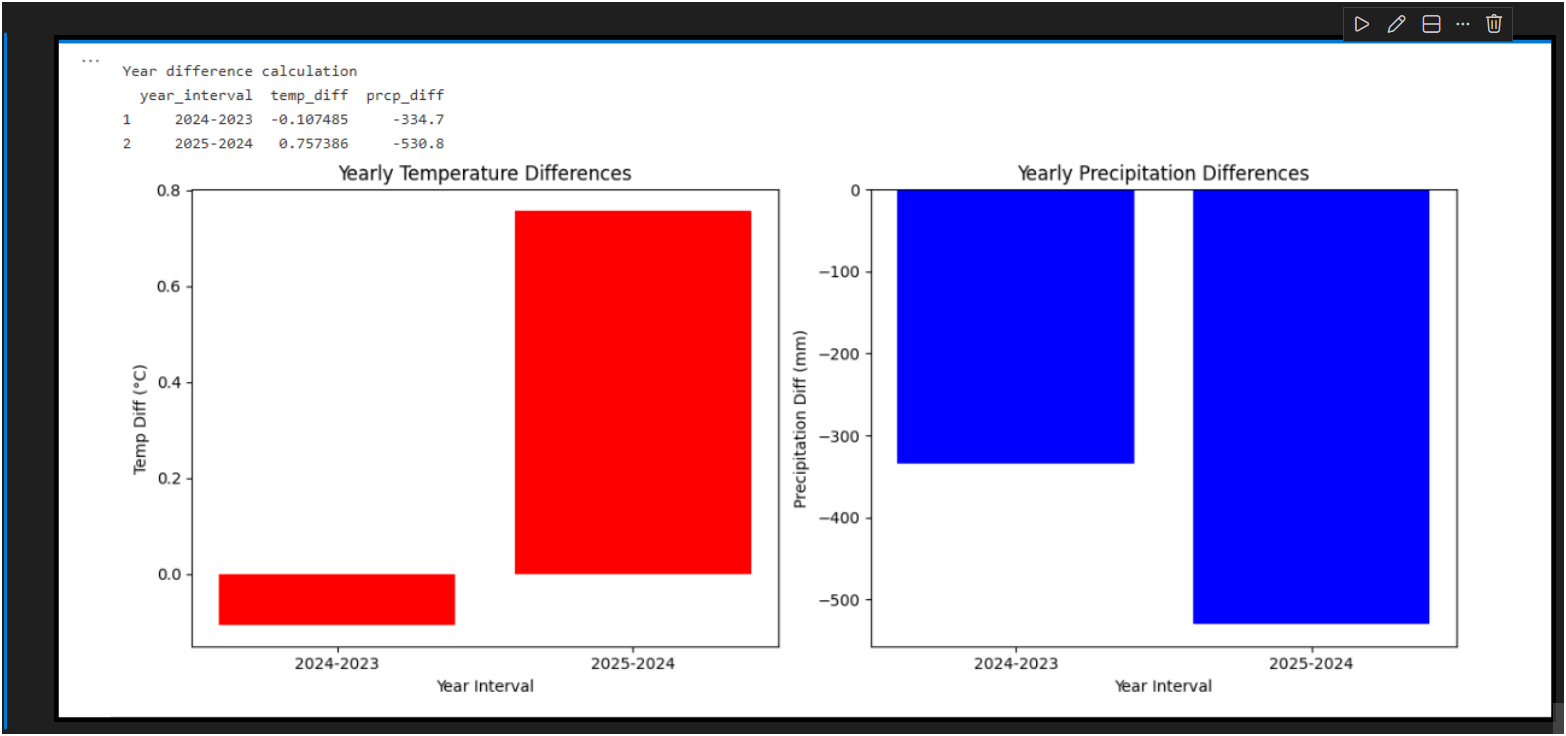

**SUMMARY**

We created two datasets named ghcn_raw and ghcn_processed. We used ghcn_raw to run queries and explore the data, checking things like how many rows there were, the average temperature at a station, and the average precipitation. Then we used ghcn_processed in Python to study the data, looking at the yearly trend of temperature and precipitation, calculating year-to-year differences. We also checked the first few temperature and precipitation records to understand the data better. We also focused on a specific town to extract and analyze its temperature and precipitation data for more insights.

**ETL STEPS**

Extract: Downloaded three CSV files (one per year) and stored them in a folder in Azure. Created two datasets: ghcn_raw for running SQL queries on the original data, and ghcn_processed to hold the processed data. We set up a connection to Azure Blob storage which is a cloud folder for our data and used a SAS token which is like a special key that allows us to read and write the files safely.

Transform: Converted the raw CSV data in ghcn_processed into Parquet format, which is a smaller and faster type of table. This made working with the data in Python notebooks much quicker. The resulting table was named climate_parquet.

Load: Saved the climate_parquet table in the cloud folder so it could be used in Python notebooks for analysis, while ghcn_raw was used for running SQL queries on the original CSV data.

# **END**